# Making publication ready figures with matplotlib

`
Authors:
Alexandre Gramfort
`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import mne
from mne.datasets import sample
mne.set_log_level('warning')
data_path = sample.data_path()
evoked_fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
evoked = mne.read_evokeds(evoked_fname, condition='Left Auditory', baseline=(None, 0))

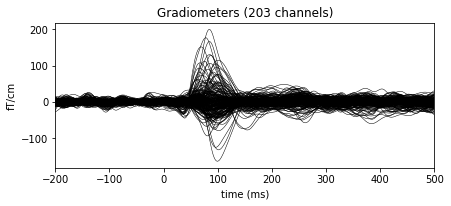

In [3]:
evoked.pick_types(meg='grad')
evoked.plot();

Set the figure size, add t=0 vertical line, add text

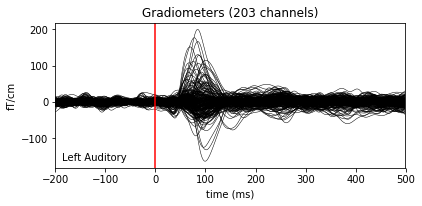

In [4]:
def my_plot():
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    evoked.pick_types(meg='grad')
    evoked.plot(axes=ax, show=False)
    ax.axvline(0., color='r');
    ax.text(x=0.02, y=0.05, s='Left Auditory', transform=ax.transAxes)

my_plot()

## Change matplotlib style using seaborn

In [5]:
import seaborn as sns

In [6]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    # Set the font to be serif, rather than sans
    sns.set(font='serif', font_scale=1.2)
    sns.set_palette('muted')
    # Make the background white, and specify the
    # specific font family
    sns.set_style("whitegrid", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })


set_style()

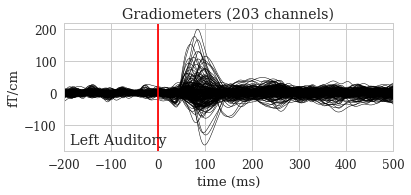

In [7]:
my_plot()

## Fine customization of your plots

What have every text in magenta? and the lines in red?

Use the `findobj` figure method.

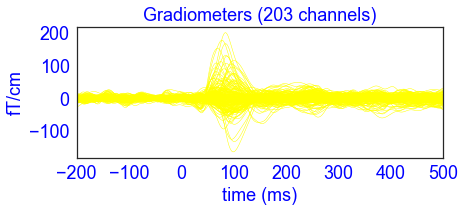

In [8]:
import matplotlib as mpl

sns.set_style("white")

fig = evoked.plot(show=False)  # butterfly plots


fig.subplots_adjust(hspace=1.0)
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(18)
    text.set_color('blue')

for line in fig.findobj(mpl.lines.Line2D):
    line.set_color('yellow')

## Teaser on seaborn with Pandas

In [9]:
import numpy as np
import pandas as pd

In [10]:
evoked_peak = evoked.copy().crop(0.07, 0.1)
data = evoked_peak.data

In [11]:
peaks = np.max(data, axis=1)
peaks.shape

(203,)

In [12]:
latencies = evoked_peak.times[np.argmax(data, axis=1)]
latencies.shape

(203,)

In [13]:
ch_names = evoked.ch_names
len(ch_names)

203

In [14]:
layout = mne.find_layout(evoked.info)
layout

<Layout | Vectorview-grad - Channels: MEG 0113, MEG 0112, MEG 0122 ...>

In [15]:
idx = [k for k, n in enumerate(layout.names) if n in ch_names]
len(idx)

203

In [16]:
pos_x, pos_y, _, _ = layout.pos[idx].T
pos_x.shape

(203,)

In [17]:
df = pd.DataFrame(dict(ch_names=ch_names, peaks=1e13 * peaks,
                       latencies=1e3 * latencies,
                       pos_x=pos_x, pos_y=pos_y))
df.head()

,ch_names,latencies,peaks,pos_x,pos_y
0,MEG 0113,99.897607,53.321297,0.062990,0.716399
1,MEG 0112,69.928325,4.175101,0.062990,0.754166
2,MEG 0122,73.258245,15.892735,0.129947,0.747747
3,MEG 0123,69.928325,-11.295424,0.129947,0.785514
4,MEG 0132,69.928325,6.128398,0.089154,0.625307


In [18]:
df.peaks.describe()

count    203.000000
mean      17.624622
std       39.602372
min      -43.593488
25%       -5.917230
50%        9.890366
75%       28.629703
max      199.915180
Name: peaks, dtype: float64

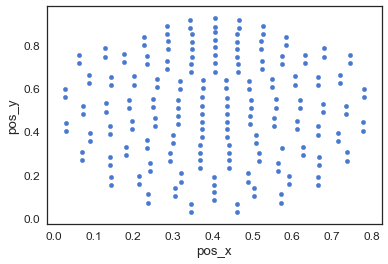

In [19]:
sns.set_palette('muted')
df.plot.scatter('pos_x', 'pos_y')

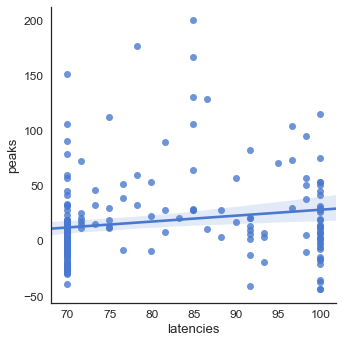

In [20]:
sns.lmplot(x="latencies", y="peaks", data=df);

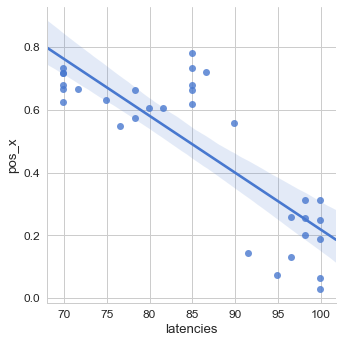

In [21]:
sns.set_style("whitegrid")
sns.lmplot(x="latencies", y="pos_x", data=df[df.peaks > 50]);

In [22]:
m = np.mean(df.pos_x)
print(m)
df['laterality'] = [('Left' if p < m else 'Right') for p in df.pos_x]

0.403390651112


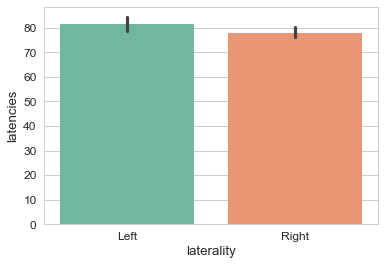

In [23]:
sns.set_style("whitegrid")
sns.set_palette('Set2')
sns.barplot(data=df, x='laterality', y='latencies');